<a href="https://colab.research.google.com/github/Ujoshna/OIBSIP/blob/main/oibsip-task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      **Exploratory Data Analysis (EDA) on Retail Sales Data**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df1 = pd.read_csv('/content/retail_sales_dataset.csv')
df2 = pd.read_csv('/content/menu.csv')

# Display the first few rows of the dataframes
print("Dataset 1:")
print(df1.head())
print("\nDataset 2:")
print(df2.head())


Dataset 1:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset 2:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Saus

In [ ]:
# Step 2: Data Loading and Cleaning
# Check for missing values
print("Missing values in Dataset 1:")
print(df1.isnull().sum())

print("\nMissing values in Dataset 2:")
print(df2.isnull().sum())

# Fill or drop missing values as needed
df1.fillna(method='ffill', inplace=True)
df2.fillna(method='ffill', inplace=True)

Missing values in Dataset 1:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Missing values in Dataset 2:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)     

In [ ]:
# Step 3: Descriptive Statistics for Numeric Columns
# Basic statistics for df1 (numeric columns only)
print("Basic Statistics for df1 (Numeric Columns Only):")
print(df1.describe(include=[np.number]))

# Basic statistics for df2 (numeric columns only)
print("Basic Statistics for df2 (Numeric Columns Only):")
print(df2.describe(include=[np.number]))

# Select numeric columns from df1
numeric_df1 = df1.select_dtypes(include=[np.number])

# Calculate mean, median, mode, and standard deviation for numeric columns in df1
print("Mean for df1:\n", numeric_df1.mean())
print("Median for df1:\n", numeric_df1.median())
print("Mode for df1:\n", numeric_df1.mode().iloc[0])
print("Standard Deviation for df1:\n", numeric_df1.std())

# Select numeric columns from df2
numeric_df2 = df2.select_dtypes(include=[np.number])

# Calculate mean, median, mode, and standard deviation for numeric columns in df2
print("Mean for df2:\n", numeric_df2.mean())
print("Median for df2:\n", numeric_df2.median())
print("Mode for df2:\n", numeric_df2.mode().iloc[0])
print("Standard Deviation for df2:\n", numeric_df2.std())

Basic Statistics for df1 (Numeric Columns Only):
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000
Basic Statistics for df2 (Numeric Columns Only):
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385

Columns in df1: Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


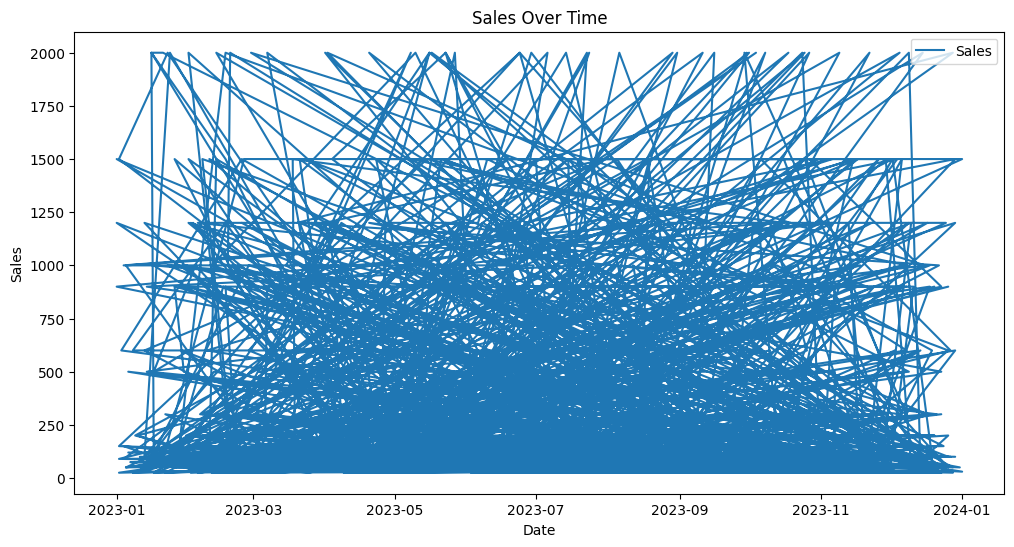

In [ ]:
# Step 4: Time Series Analysis
# Ensure the 'Date' column is present in df1
print("Columns in df1:", df1.columns)

# Convert Date column to datetime
if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'])
else:
    raise KeyError("The column 'Date' does not exist in df1")

# Identify the sales column (using 'Total Amount' as the sales column)
sales_column = 'Total Amount'

# Check if the identified sales column exists and is numeric
if sales_column in df1.columns:
    if not np.issubdtype(df1[sales_column].dtype, np.number):
        raise TypeError(f"The column '{sales_column}' is not numeric")
else:
    raise KeyError(f"The column '{sales_column}' does not exist in df1")

# Set Date as index
df1.set_index('Date', inplace=True)

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(df1[sales_column], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

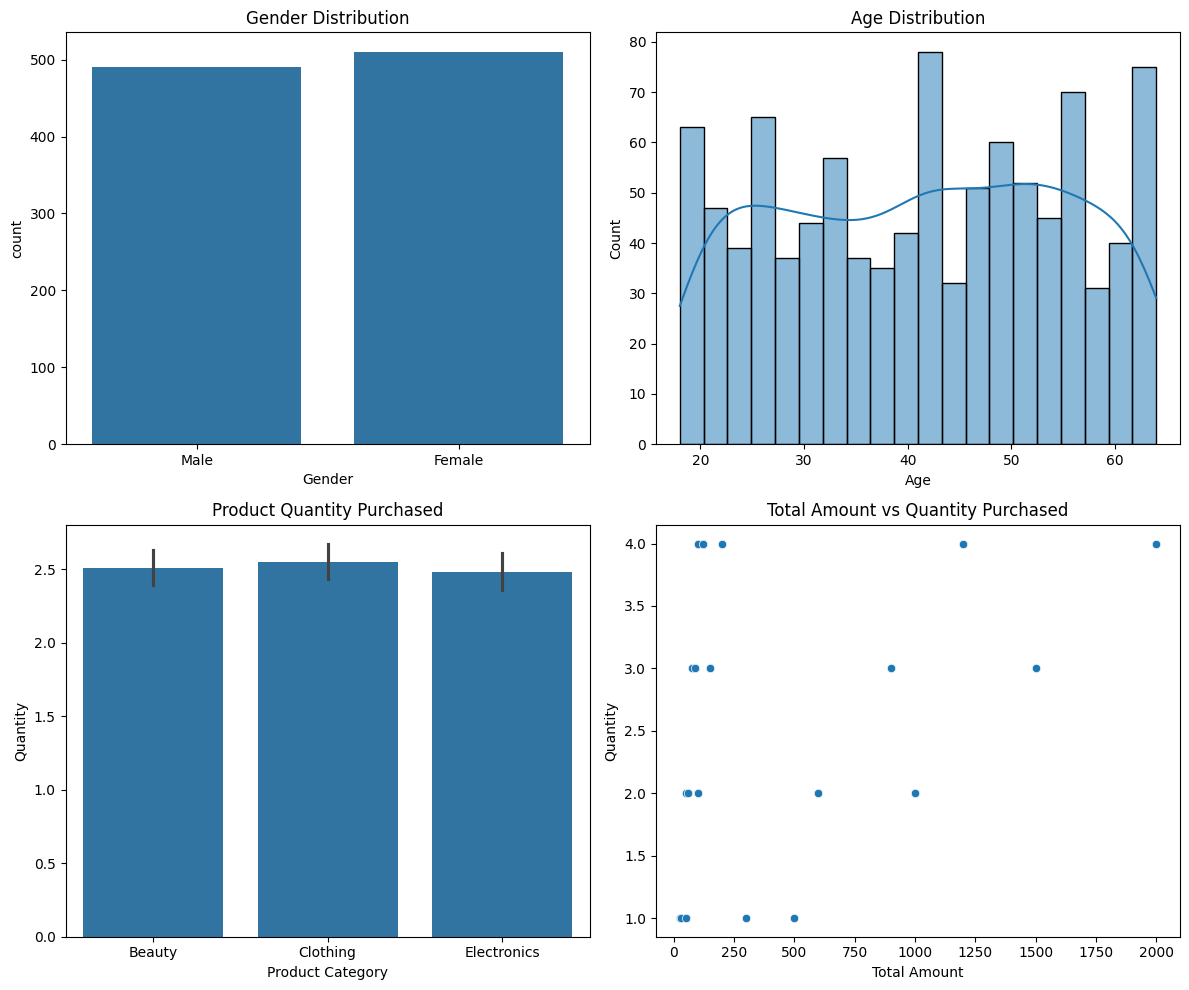

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Customer demographics
sns.countplot(x='Gender', data=df1, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.histplot(df1['Age'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

# Product purchasing behavior
sns.barplot(x='Product Category', y='Quantity', data=df1, ax=axes[1, 0])
axes[1, 0].set_title('Product Quantity Purchased')

sns.scatterplot(x='Total Amount', y='Quantity', data=df1, ax=axes[1, 1])
axes[1, 1].set_title('Total Amount vs Quantity Purchased')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
# Step 6: Recommendations
# Based on the analysis, you can provide recommendations.
print("Recommendations:")
print("1. Promote sales during identified peak periods.")
print("2. Stock up on popular products identified in the analysis.")
print("3. Tailor marketing campaigns based on customer demographics.")

Recommendations:
1. Promote sales during identified peak periods.
2. Stock up on popular products identified in the analysis.
3. Tailor marketing campaigns based on customer demographics.
